In [1]:
import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk import word_tokenize
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import re

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>
[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>
[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


In [2]:
df = pd.read_csv('questions.csv',error_bad_lines=False, engine="python")

C:\Users\dell\AppData\Local\Temp\ipykernel_2020\239151902.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('questions.csv',error_bad_lines=False, engine="python")


In [3]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [4]:
df.shape

(404351, 6)

In [5]:
df.dropna(axis = 0, inplace =True)

In [6]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [7]:
df.shape

(404348, 6)

In [8]:
df =pd.DataFrame(df)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404348 entries, 0 to 404350
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404348 non-null  int64 
 1   qid1          404348 non-null  int64 
 2   qid2          404348 non-null  int64 
 3   question1     404348 non-null  object
 4   question2     404348 non-null  object
 5   is_duplicate  404348 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 21.6+ MB


In [10]:
df.drop('id',axis = 1, inplace =True)

In [11]:
df['qid2'] = df['qid2'].astype(int)
df['is_duplicate'] = df['is_duplicate'].astype(int)
df.tail(5)


,qid1,qid2,question1,question2,is_duplicate
404346,789792,789793,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404347,789794,789795,Do you believe there is life after death?,Is it true that there is life after death?,1
404348,789796,789797,What is one coin?,What's this coin?,0
404349,789798,789799,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0
404350,789800,789801,What is like to have sex with cousin?,What is it like to have sex with your cousin?,0


In [12]:
df.sample(10)

,qid1,qid2,question1,question2,is_duplicate
254879,501696,501697,"As a solo founder, shouldn't I still execute a...",Role of doctors against abortion?,0
871,1743,1744,Is it normal if your sperm doesn't shoot out d...,How do I ensure that semen doesn't come out fr...,0
258154,508099,508100,Why do I look beautiful in some mirrors and ug...,Is it true that when we look at ourselves on a...,0
61640,122586,122587,What is a suitable solar panel installation pr...,What is a suitable solar panel installation pr...,0
39290,78269,78270,What do deaf people imagine hearing sound is l...,What do Deaf people imagine sound to be?,1
249785,491795,491796,How much does an aluminum window and door corn...,How much do US college counsellors cost in india?,0
288015,565967,565968,Has Donald Trump ever committed a crime?,Has Donald Trump ever broken the law?,1
403872,788877,788878,How can an aircraft carrier survive a sea stat...,How does an aircraft carrier stay level?,0
250440,493070,493071,What are your views about Narendra Modi's deci...,What are your views on the Rs 500 and 1000 not...,1
211634,417407,417408,What are some cultural faux pas at LinkedIn?,What are cultural faux pas?,0


In [13]:
df['is_duplicate'].value_counts()

0    255042
1    149306
Name: is_duplicate, dtype: int64

In [14]:
df.duplicated().sum() # to check weather some row is completely duplicate or not 

0

In [15]:
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100) # calculating percentage

0    63.074876
1    36.925124
Name: is_duplicate, dtype: float64


In [16]:
# 62% values are not duplicate, 38 are duplicate

In [17]:
qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
unique_ques = np.unique(qid)
unique_ques_number = unique_ques.shape
print(unique_ques_number)
print(len(qid))

(789795,)
808696


In [18]:
repeated = len(qid) - unique_ques_number[0]
repeated

18901

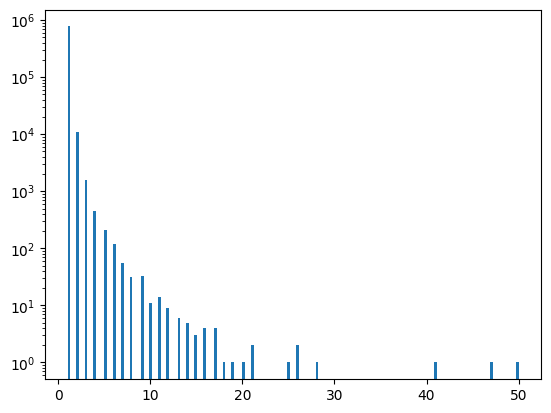

In [19]:
plt.hist(qid.value_counts().values, bins =160)
plt.yscale('log')
plt.show()

In [20]:
df = df[['question1','question2','is_duplicate']]
df

,question1,question2,is_duplicate
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...
404346,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404347,Do you believe there is life after death?,Is it true that there is life after death?,1
404348,What is one coin?,What's this coin?,0
404349,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [21]:
new_df = df.sample(30000, random_state=2)

In [22]:
x = new_df[['question1','question2']]
x

,question1,question2
302477,What are kalman filters used for?,What are examples of filters used in a home?
369857,How do Relationship work?,What matters in the life most dignity or money?
4665,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...
54203,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...
132567,Does Google Maps account for change in speed w...,What speed does Google Maps assume when it gen...
...,...,...
314121,What are the best monospace or fixed-width fon...,Are monospace or proportional fonts better for...
142895,How is Christmas celebrated in Mexico?,How is Christmas celebrated?
43027,How do you identify a closeted gay person?,I am a closet Christian. How do I tell my gay ...
154199,What is a suitable inpatient drug and alcohol ...,What is a suitable inpatient drug and alcohol ...


In [23]:
y = new_df['is_duplicate']
type(y)


pandas.core.series.Series

In [24]:
def remove_punctuation(text):
    cleaned_text = re.sub(r'[^\w\s]', '', text)
    return cleaned_text

In [25]:
new_df['question1'] = new_df['question1'].apply(remove_punctuation)
new_df['question2'] = new_df['question2'].apply(remove_punctuation)




In [26]:
sw = stopwords.words('english')
def remove_stopwords(text):
   
    words = word_tokenize(text)
    wo_stopwords = [word for word in words if word.lower not in sw]
    
    return " ".join(wo_stopwords)

In [27]:
# new_df['question1'] = new_df['question1'].apply(remove_stopwords)
# new_df['question2'] = new_df['question2'].apply(remove_stopwords)



In [28]:
def num_words(text):
  words = word_tokenize(text)
  num = len(words)
  return num
new_df['numberofwords1'] = new_df['question1'].apply(num_words)
new_df['numberofwords2'] = new_df['question2'].apply(num_words)


In [29]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


# Create an instance of CountVectorizer
vectorizer = TfidfVectorizer(max_features=3000)
questions = list(new_df['question1']) + list(new_df['question2'])

q1_arr, q2_arr = np.vsplit(vectorizer.fit_transform(questions).toarray(),2)
q1_arr



array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [30]:
temp_df1 = pd.DataFrame(q1_arr, index=new_df.index)
temp_df2 = pd.DataFrame(q2_arr, index=new_df.index) 

In [31]:
temp_df = pd.concat([temp_df1,temp_df2], axis = 1)

In [32]:
temp_df

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
302477,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
369857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4665,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54203,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
132567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
142895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43027,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
154199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
temp_df['is_duplicate'] = new_df['is_duplicate']
temp_df['num_words'] = new_df['numberofwords1'] + new_df['numberofwords2']


temp_df

,0,1,2,3,4,5,6,7,8,9,...,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate,num_words
302477,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,15
369857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,13
4665,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,40
54203,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,18
132567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,20
142895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,10
43027,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,25
154199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,28


In [34]:
def num_char(text):
  characters = list(text)
  num_char = len(characters)
  return num_char


In [35]:
new_df['numberofchar1'] = new_df['question1'].apply(num_char)
new_df['numberofchar2'] = new_df['question2'].apply(num_char)

In [36]:
temp_df['num_char1'] = new_df['numberofchar1']
temp_df['num_char2'] = new_df['numberofchar2']

In [37]:
def count_common_words(row, col1, col2):
    words1 = set(re.findall(r'\w+', row[col1].lower()))
    words2 = set(re.findall(r'\w+', row[col2].lower()))
    common_words = words1.intersection(words2)
    return len(common_words)



In [38]:
temp_df['CommonWordsCount'] = new_df.apply(count_common_words, args=('question1', 'question2'), axis=1)


In [39]:
temp_df['word_share'] = temp_df['CommonWordsCount']/temp_df['num_words']

In [40]:
temp_df['wordsin1'] = new_df['numberofwords1']
temp_df['wordsin2'] = new_df['numberofwords2']

In [41]:
temp_df['unique_words'] = temp_df['num_words'] - temp_df['CommonWordsCount']

In [42]:
temp_df['uniqueness_per_word'] = temp_df['unique_words']/temp_df['num_words']

In [43]:
temp_df.columns = temp_df.columns.astype(str)


In [44]:
temp_df

,0,1,2,3,4,5,6,7,8,9,...,is_duplicate,num_words,num_char1,num_char2,CommonWordsCount,word_share,wordsin1,wordsin2,unique_words,uniqueness_per_word
302477,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,15,32,43,4,0.266667,6,9,11,0.733333
369857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,13,24,46,0,0.000000,4,9,13,1.000000
4665,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,40,105,104,18,0.450000,20,20,22,0.550000
54203,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,18,44,59,6,0.333333,8,10,12,0.666667
132567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,26,70,83,6,0.230769,12,14,20,0.769231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,20,70,58,6,0.300000,12,8,14,0.700000
142895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,10,37,27,4,0.400000,6,4,6,0.600000
43027,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,25,41,73,4,0.160000,8,17,21,0.840000
154199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,28,79,80,13,0.464286,14,14,15,0.535714


In [56]:
X = temp_df.drop(columns = ['is_duplicate'], axis=1)
X.shape

(30000, 6009)

In [46]:
Y = temp_df['is_duplicate']

In [47]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 43)

In [55]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
classifier = Sequential()


In [ ]:
classifier.add(Dense(activation = 'relu', input_shape= (6009,)))


In [ ]:
classifier.add(Dense(activation = 'sigmoid'))
classifier.compile(optimizer='adam',metrics= ['accuracy'])

In [49]:
y_predict = classifier.predict(x_test)

In [50]:
accuracy = accuracy_score(y_test, y_predict)


In [51]:
accuracy

0.7483333333333333

In [52]:
temp_df

,0,1,2,3,4,5,6,7,8,9,...,is_duplicate,num_words,num_char1,num_char2,CommonWordsCount,word_share,wordsin1,wordsin2,unique_words,uniqueness_per_word
302477,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,15,32,43,4,0.266667,6,9,11,0.733333
369857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,13,24,46,0,0.000000,4,9,13,1.000000
4665,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,40,105,104,18,0.450000,20,20,22,0.550000
54203,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,18,44,59,6,0.333333,8,10,12,0.666667
132567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,26,70,83,6,0.230769,12,14,20,0.769231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,20,70,58,6,0.300000,12,8,14,0.700000
142895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,10,37,27,4,0.400000,6,4,6,0.600000
43027,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,25,41,73,4,0.160000,8,17,21,0.840000
154199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,28,79,80,13,0.464286,14,14,15,0.535714


In [53]:
temp_df[['num_words','num_char1','num_char2','word_share','CommonWordsCount', 'wordsin1','wordsin2','unique_words','uniqueness_per_word']].describe()

,num_words,num_char1,num_char2,word_share,CommonWordsCount,wordsin1,wordsin2,unique_words,uniqueness_per_word
count,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000
mean,22.048133,57.88470,58.266467,0.234845,4.852333,10.919733,11.128400,17.19580,0.765155
std,10.048452,29.46421,32.834042,0.125519,3.081262,5.458090,6.238297,9.25261,0.125519
min,5.000000,0.00000,8.000000,0.000000,0.000000,0.000000,1.000000,3.00000,0.500000
25%,16.000000,38.00000,38.000000,0.138462,3.000000,7.000000,7.000000,11.00000,0.666667
50%,20.000000,50.00000,49.000000,0.230769,4.000000,10.000000,9.000000,15.00000,0.769231
75%,26.000000,70.00000,70.000000,0.333333,6.000000,13.000000,13.000000,21.00000,0.861538
max,255.000000,421.00000,1130.000000,0.500000,40.000000,79.000000,228.000000,242.00000,1.000000


In [54]:
correlation = temp_df[['num_words',	'num_char1',	'num_char2',	'word_share','unique_words'	,'CommonWordsCount', 'wordsin1','wordsin2','is_duplicate','uniqueness_per_word']].corr()
correlation['is_duplicate']


num_words             -0.178428
num_char1             -0.165094
num_char2             -0.152487
word_share             0.367302
unique_words          -0.264617
CommonWordsCount       0.212729
wordsin1              -0.151203
wordsin2              -0.155113
is_duplicate           1.000000
uniqueness_per_word   -0.367302
Name: is_duplicate, dtype: float64